# Naive Bayes


### Naive Bayes sınıflandırma algoritması, istatistiksel bir sınıflandırma algoritmasıdır ve makine öğrenimi alanında yaygın olarak kullanılan bir yöntemdir. Temel olarak Bayes teoremine dayanan bu algoritma, sınıflandırma yaparken verilerin özelliklerini kullanır.

### Naive Bayes algoritması, "naive" (saf veya safdışı) olarak adlandırılır, çünkü sınıflandırma yaparken özellikler arasında bağımsızlık varsayımında bulunur. Bu, her bir özelliğin sınıfı belirlemedeki etkisini bağımsız olarak değerlendireceği anlamına gelir. Gerçek dünyada, özellikler genellikle birbiriyle ilişkili olabilir, ancak bu varsayım, modelin yeterli bir performans sergilemesini sağlayabilir.

## Naive Bayes algoritmasının temel adımları şunlardır:

### Veri Kümesinin Hazırlanması: İlk adımda, sınıflandırma yapmak için kullanılacak veri kümesi hazırlanır. Veri seti, sınıflandırmak istediğiniz örneklerden ve bu örneklerin özelliklerinden oluşur.

### Özelliklerin Seçimi: Sınıflandırma yapmak için kullanılacak özellikler seçilir. Özellikler, veri kümesindeki her bir örnek için sayısal veya kategorik değerler olabilir.

### Olasılık Dağılımlarının Tahmin Edilmesi: Naive Bayes algoritması, veri kümesindeki her bir özelliğin sınıflara ait olasılık dağılımlarını tahmin eder. Bu, her bir eder. Bu, her bir özelliğin her bir sınıfa ait olasılık yoğunluk fonksiyonunu hesaplamayı gerektirir.

### Bayes Teoremini Kullanarak Sınıfın Belirlenmesi: Naive Bayes algoritması, Bayes teoremini kullanarak verilen bir örneğin sınıfını belirler. Bayes teoremi, sınıfın verilen özelliklere dayalı olarak nasıl tahmin edilebileceğini açıklar. Bu adımda, önceki adımda hesaplanan olasılık dağılımları kullanılır.

### Modelin Eğitilmesi ve Test Edilmesi: Naive Bayes algoritması, veri kümesini eğitim ve test verisi olarak ayırır. Eğitim verileri üzerinde model eğitilir ve ardından test verileri kullanılarak modelin performansı değerlendirilir.

## Naive Bayes Algoritması Hakkında Bazı Önemli Detaylar Şunlardır:

### Naive Bayes algoritması, özellikle doğal dil işleme, spam filtreleme, duygu analizi gibi metin tabanlı sınıflandırma problemlerinde etkilidir.

### Algoritma, küçük veri setleri üzerinde iyi performans gösterir ve hızlı bir şekilde eğitilir. Ancak, veri seti büyüdükçe ve özellikler arasındaki bağımlılık arttıkça performansı düşebilir.

### Özellikler arasında gerçekten bağımsızlık varsayımı, gerçek dünyadaki verilere uygulanamaz. Bu nedenle, özellikler arasındaki bağımlılıkları yakalamak için daha gelişmiş yöntemler kullanılabilir.

### Sınıflar arasındaki dengesizlikler, Naive Bayes algoritmasının performansını etkileyebilir. Eğer sınıflar arasında büyük bir dengesizlik varsa, algoritmanın doğruluk oranı düşebilir.

### Naive Bayes algoritması, hafızada tutulan parametreleri gerektirir. Bu nedenle, yeni bir örneği sınıflandırmak için hesaplamarı hızlı bir şekilde yapabilir. 

### Laplace düzeltmesi, Naive Bayes algoritmasında kullanılan bir tekniktir ve küçük veri setleriyle çalışırken aşırı uyum sorununu azaltmaya yardımcı olur.

## Gaussian Naive Bayes

### Gaussian Naive Bayes, özelliklerin sürekli bir Gauss dağılımına sahip olduğu veri setleri için uygundur. Özellikler, genellikle gerçek sayı değerleridir. Örneğin, bir kişinin boyu, kilosu ve yaşının olduğu bir veri setinde bu tür sürekli değerler kullanılabilir. Gaussian Naive Bayes, özelliklerin Gauss dağılımlarını kullanarak olasılık yoğunluk fonksiyonlarını tahmin eder.

## Multinomial Naive Bayes

### Multinomial Naive Bayes, özelliklerin çok sınıflı dağılımlara sahip olduğu veri setleri için uygundur. Özellikler, genellikle kategori veya frekans gibi sayısal veya kategorik değerlerdir. Örneğin, bir metindeki kelime frekansları veya belge sınıflandırmasında kullanılan kategori etiketleri bu tür verilere örnek olarak verilebilir. Multinomial Naive Bayes, özelliklerin olasılık dağılımlarını tahmin ederken, çok sınıflı olasılık yoğunluk fonksiyonlarını kullanır.

## Gaussian Naive Bayes

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [28]:
# Veri setini oluşturalım.

data = pd.DataFrame({
    'Ders1': np.random.randint(0, 101, 50),
    'Ders2': np.random.randint(0, 101, 50),
    'Ders3': np.random.randint(0, 101, 50),
    'Sınıf': np.random.choice(['A', 'B', 'C'], size=50)
})
data.head()

,Ders1,Ders2,Ders3,Sınıf
0,80,62,96,A
1,20,95,18,B
2,97,58,86,C
3,38,16,95,C
4,13,47,77,C


# Veri Analizi

In [29]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Ders1,50.0,38.80,26.303565,3.0,17.75,33.5,54.25,99.0
Ders2,50.0,50.50,28.447051,3.0,22.00,56.0,72.75,97.0
Ders3,50.0,52.12,28.591878,6.0,21.25,55.5,78.75,96.0


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Ders1   50 non-null     int32 
 1   Ders2   50 non-null     int32 
 2   Ders3   50 non-null     int32 
 3   Sınıf   50 non-null     object
dtypes: int32(3), object(1)
memory usage: 1.1+ KB


In [31]:
data.corr()

,Ders1,Ders2,Ders3
Ders1,1.000000,-0.118534,0.194082
Ders2,-0.118534,1.000000,0.025995
Ders3,0.194082,0.025995,1.000000


In [32]:
data.var(numeric_only=True)

Ders1    691.877551
Ders2    809.234694
Ders3    817.495510
dtype: float64

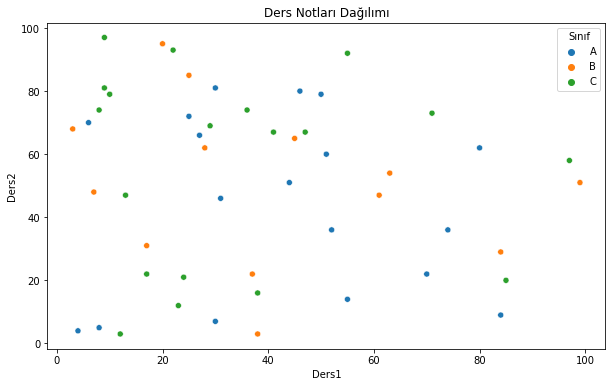

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Ders1', y='Ders2', hue='Sınıf')
plt.title('Ders Notları Dağılımı')
plt.show()

In [34]:
data.isnull().any().sum()

0

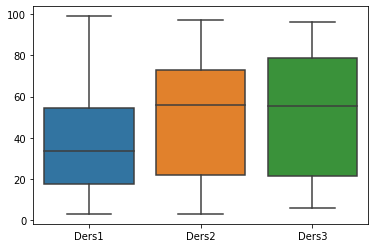

In [35]:
sns.boxplot(data=data);

# Model

In [36]:
# Bağımlı ve bağımsız değişkenleri oluşturalım.
X = data.drop('Sınıf', axis=1)
y = data['Sınıf']

In [37]:
# Eğitim ve test setlerini ayıralım.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Modeli Oluşturalım
model = GaussianNB().fit(X_train, y_train)

In [39]:
# Tahmin İşlemi Yapalım.
predict = model.predict(X_test)

In [40]:
# Modeli Değerlendirelim.

class_report = classification_report(y_test, predict)
conf_matrix = confusion_matrix(y_test, predict)
accuracy = accuracy_score(y_test, predict)

print('Accuracy Score: ', accuracy)
print('Confusion Matrix:\n ', conf_matrix)
print('Classification Report:\n ', class_report)

Accuracy Score:  0.5
Confusion Matrix:
  [[4 1 1]
 [1 0 0]
 [2 0 1]]
Classification Report:
                precision    recall  f1-score   support

           A       0.57      0.67      0.62         6
           B       0.00      0.00      0.00         1
           C       0.50      0.33      0.40         3

    accuracy                           0.50        10
   macro avg       0.36      0.33      0.34        10
weighted avg       0.49      0.50      0.49        10



In [41]:
result = pd.DataFrame({
    'Gerçek': y_test,
    'Tahmin': predict
})
result.head(10)

,Gerçek,Tahmin
13,C,A
39,C,A
30,A,A
45,C,C
17,A,A
48,A,B
26,B,A
25,A,A
32,A,A
19,A,C


In [42]:
data['Sınıf'].size

50

In [43]:
predict.size

10

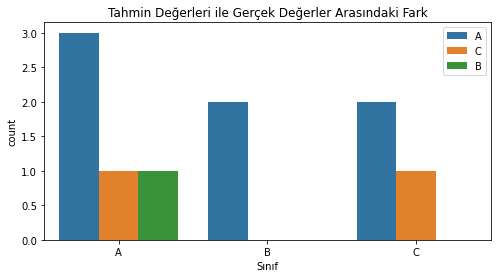

In [44]:
plt.figure(figsize=(8, 4))
sns.countplot(data=data, x=data['Sınıf'][0:10], hue=predict)
plt.title('Tahmin Değerleri ile Gerçek Değerler Arasındaki Fark')
plt.show()

# Multinomial Naive Bayes

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [46]:
# Veri Seti Oluşturalım.

data = {
    'Metin': ['Bugün harika bir gün!', 'Üzgünüm, kötü bir günüm var.', 'Bu filmi çok beğendim.',
              'Hava çok güzel.', 'Maalesef sınavdan geçemedim.', 'Yeni bir araba aldım ve çok mutluyum.',
              'Çok sıkıldım, yapacak hiçbir şey yok.', 'Yeni işimden dolayı çok stresliyim.'],
    'Duygu': ['Pozitif', 'Negatif', 'Pozitif', 'Pozitif', 'Negatif', 'Pozitif', 'Negatif', 'Negatif']
}

data = pd.DataFrame(data=data)
data.head()

,Metin,Duygu
0,Bugün harika bir gün!,Pozitif
1,"Üzgünüm, kötü bir günüm var.",Negatif
2,Bu filmi çok beğendim.,Pozitif
3,Hava çok güzel.,Pozitif
4,Maalesef sınavdan geçemedim.,Negatif


# Model

In [47]:
# Metinleri sayılara dönüştürme
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['Metin'])

In [48]:
# Eğitim ve test setlerini ayıralım.
X_train, X_test, y_train, y_test = train_test_split(X, data['Duygu'], test_size=0.2, random_state=42)

In [49]:
# Model Oluşturalım ve Eğitelim.
model = MultinomialNB().fit(X_train, y_train)

In [50]:
# Tahmin yapalım
predict = model.predict(X_test)

In [51]:
# Modeli Değerlendirelim.
accuracy = accuracy_score(y_test, predict)
confusion_matrix = confusion_matrix(y_test, predict)

print('Accuracy Score: ', accuracy)
print('Confusion Matrix:\n ', confusion_matrix)

Accuracy Score:  0.5
Confusion Matrix:
  [[0 1]
 [0 1]]


# Tahmin

In [65]:
user_input = ['Maalesef sınavdan geçemedim.']
vectorized = vectorizer.transform(user_input)
predict = model.predict(vectorized)
print('Tahmin: ', predict[0])

Tahmin:  Negatif


# Confusion Matrix Çıktısının Yorumlanması

In [69]:
conf_matrix

array([[4, 1, 1],
       [1, 0, 0],
       [2, 0, 1]], dtype=int64)

### Bu Confusion Matrix, 3 sınıflı bir sınıflandırma problemini temsil eder. Her bir satır gerçek sınıfı, her bir sütun ise tahmin edilen sınıfları gösterir.

### İlk satır, gerçek sınıfı 0 olan örnekler için tahmin edilen sınıfları gösterir. 1. sütundaki 4 değeri, gerçek sınıfı 0 olan örneklerin doğru bir şekilde tahmin edildiğini (True Positive) gösterir. 2. sütundaki 1 değeri, gerçek sınıfı 0 olan örneklerin yanlış bir şekilde tahmin edildiğini (False Negative) gösterir. 3. sütundaki 1 değeri ise, gerçek sınıfı 0 olan örneklerin başka bir sınıf olarak yanlış tahmin edildiğini (False Positive) gösterir.

### İkinci satır, gerçek sınıfı 1 olan örnekler için tahmin edilen sınıfları gösterir. 1. sütundaki 1 değeri, gerçek sınıfı 1 olan örneklerin doğru bir şekilde tahmin edildiğini (True Positive) gösterir. Diğer sütunlar ise 0 değerine sahip olduğu için, gerçek sınıfı 1 olan örneklerin diğer sınıflar olarak yanlış tahmin edildiğini (False Positive) gösterir.

### Üçüncü satır, gerçek sınıfı 2 olan örnekler için tahmin edilen sınıfları gösterir. 1. sütundaki 2 değeri, gerçek sınıfı 2 olan örneklerin doğru bir şekilde tahmin edildiğini (True Positive) gösterir. Diğer sütunlar ise 0 değerine sahip olduğu için, gerçek sınıfı 2 olan örneklerin diğer sınıflar olarak yanlış tahmin edildiğini (False Positive) gösterir.

## Bu Confusion Matrix'e dayanarak, sınıflandırma modelinin her bir sınıf için performansını değerlendirebiliriz.

### Sınıf 0: 4 doğru tahmin (True Positive), 1 yanlış negatif (False Negative), 1 yanlış pozitif (False Positive) örneği vardır.

### Sınıf 1: 1 doğru tahmin (True Positive), 0 yanlış negatif (False Negative), 0 yanlış pozitif (False Positive) örneği vardır.

### Sınıf 2: 1 doğru tahmin (True Positive), 0 yanlış negatif (False Negative), 2 yanlış pozitif (False Positive) örneği vardır.



### Bu bilgiler, modelin her bir sınıf için ne kadar etkili olduğunu ve hangi sınıfların daha iyi veya daha kötü tahmin edildiğini anlamamıza yardımcı olur. Bu şekilde, modelin performansını değerlendirerek iyileştirmeler yapabilir veya sınıflandırma problemlemini daha iyi anlayabiliriz.

# Classification Report Yorumlanması

In [71]:
print(class_report)

              precision    recall  f1-score   support

           A       0.57      0.67      0.62         6
           B       0.00      0.00      0.00         1
           C       0.50      0.33      0.40         3

    accuracy                           0.50        10
   macro avg       0.36      0.33      0.34        10
weighted avg       0.49      0.50      0.49        10



### Precision: Her bir sınıf için doğru pozitif tahminlerin toplam pozitif tahminlere oranıdır. Örneğin, sınıf A için precision 0.57'dir, yani tahmin edilen sınıf A'nın %57'si gerçekten sınıf A'dır.

### Recall: Her bir sınıf için doğru pozitif tahminlerin gerçek pozitiflerin toplamına oranıdır. Örneğin, sınıf B için recall 0.00'dır, yani gerçek sınıf B'nin %0.00'ı doğru bir şekilde tahmin edilmiştir.

### F-1 score: Precision ve recall metriklerinin harmonik ortalamasıdır. Modelin hem precision'ı hemde recall'ı dikkate alarak performansını değerlendirir. F1-score, 1'e ne kadar yakınsa, modelin daha iyi bir performansa sahip olduğunu gösterir.

### Support: Her bir sınıfın gerçek veri setindeki örnek sayısını gösterir.

### Accuracy: Modelin doğru tahmin ettiği örneklerin toplam örneklere oranıdır. Bu, tüm sınıfları dikkate alarak bir başarı ölçüsü sağlar.

### Macro Avg: Tüm sınıfların precision, recall ve f1-score metriklerinin makro ortalamasıdır. Her sınıfın ağırlığına bakılmaksızın her sınıfın performansını eşit olarak değerlendirir.

### Weighted Avg: Tüm sınıfların precision, recall ve f1-score metriklerinin ağırlıklı ortalamasıdır. Her sınıfın örneklere olan katkısına bağlı olarak performansı değerlendirir.


### Bu metrikler, modelin sınıfları ne kadar doğru tahmin ettiğini, hangi sınıfların daha iyi veya daha kötü tahmin edildiğini ve modelin genel performansını değerlendirmemize yardımcı olur.